<a href="https://colab.research.google.com/github/Jiteshwagh/GooglePlayStore_Data-Analysis/blob/main/GooglePlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA ANALYSIS OF GOOGLE PLAYSTORE APP'S RATINGS

#Description
There are more than 3.04 million apps found on Google Play Store. With this project I will take you through a journey of analyzing various apps found on the play store with the help of different python libraries.
Dataset: The dataset is been taken from Kaggle

In [ ]:
#Importing all the required packages

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#Read the Data

In [ ]:
df = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
df.head(10)      #Inspecting top ten rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()         #describes all numeric values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#DATA CLEANING

In [ ]:
df.info()          #shows number of missing values and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()                    #counting the number of null values in each columns

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df1 = df.dropna()      #dropping all the null values

In [ ]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df1.shape

(9360, 13)

In [ ]:
#Converting Price, Installs and Reviews into numerical values
df1["Price"] = df1["Price"].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))        #removing dollar sign
df1["Price"] = pd.to_numeric(df1["Price"])                                                              #converting it to numeric 
df1["Reviews"] = pd.to_numeric(df1["Reviews"])                                                          #converting reviews to numeric
df1["Installs"] = df1["Installs"].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))  #removing special characyers i.e.  
df1["Installs"] = df1["Installs"].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))  # '+',',' and converting it to numeric
df1["Installs"] = pd.to_numeric(df1["Installs"])


In [ ]:
#Converting Size column from Object to Numeric
df1['Size'] = df1.Size.apply(lambda x: x.replace('+',','))# Removing the + Sign
df1['Size'] = df1.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`
df1['Size'] = df1.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
df1['Size'] = df1.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
df1['Size'] = df1.Size.replace('Varies with device', np.NaN)
df1['Size'] = pd.to_numeric(df1['Size']) # Converting the string to Numeric type
df1.dropna(subset = ['Size'], inplace=True)     #dropping NaN values

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


In [ ]:
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,7723.000000,7.723000e+03,7.723000e+03,7.723000e+03,7723.000000
mean,4.173935,2.948983e+05,2.297046e+07,8.424070e+06,1.128169
std,0.544638,1.863933e+06,2.344963e+07,5.015742e+07,17.408036
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.075000e+02,5.300000e+06,1.000000e+04,0.000000
50%,4.300000,2.332000e+03,1.400000e+07,1.000000e+05,0.000000
75%,4.500000,3.905300e+04,3.300000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
df1.Rating.describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
df1.Category.unique()      #unique values in Category column

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df1.Category.value_counts()      #Number of Unique values

FAMILY                 1616
GAME                    974
TOOLS                   633
MEDICAL                 324
LIFESTYLE               280
PERSONALIZATION         278
FINANCE                 266
SPORTS                  247
BUSINESS                246
PHOTOGRAPHY             236
PRODUCTIVITY            235
HEALTH_AND_FITNESS      223
COMMUNICATION           211
SHOPPING                179
SOCIAL                  177
DATING                  173
NEWS_AND_MAGAZINES      169
TRAVEL_AND_LOCAL        160
BOOKS_AND_REFERENCE     144
VIDEO_PLAYERS           116
EDUCATION               110
MAPS_AND_NAVIGATION      95
ENTERTAINMENT            90
FOOD_AND_DRINK           84
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
HOUSE_AND_HOME           56
WEATHER                  51
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

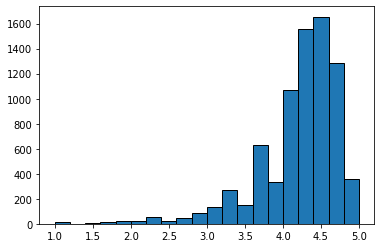

In [ ]:
plt.hist(df1.Rating,bins=20,edgecolor='k')
plt.show()

In [ ]:
df1.select_dtypes(include='object').columns     #select dataset of object type

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [ ]:
cat_col=df1.select_dtypes(include='object')    #categorical column
cat_col

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,Free,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,Free,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [ ]:
cat_col.apply(lambda x: x.unique())       #Unique values  

App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Type                                                   [Free, Paid]
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object

In [ ]:
df1.Type.value_counts()

Free    7146
Paid     577
Name: Type, dtype: int64

In [ ]:
df1.Type.value_counts()/df1.shape[0]

Free    0.925288
Paid    0.074712
Name: Type, dtype: float64

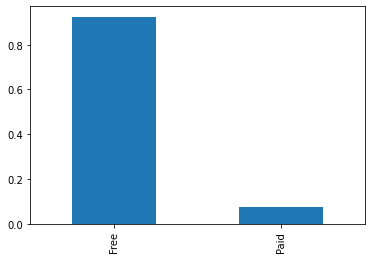

In [ ]:
(df1.Type.value_counts()/df1.shape[0]).plot(kind='bar')


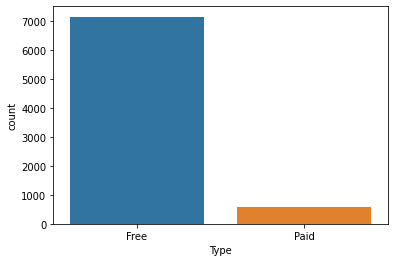

In [ ]:
sns.countplot(x='Type',data=df1)
plt.show()

#Data Visualization

* Q1. Category Wise Rating

In [ ]:
df1['Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10833    BOOKS_AND_REFERENCE
10834                 FAMILY
10836                 FAMILY
10837                 FAMILY
10840              LIFESTYLE
Name: Category, Length: 7723, dtype: object>

In [ ]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df1['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7723, dtype: float64

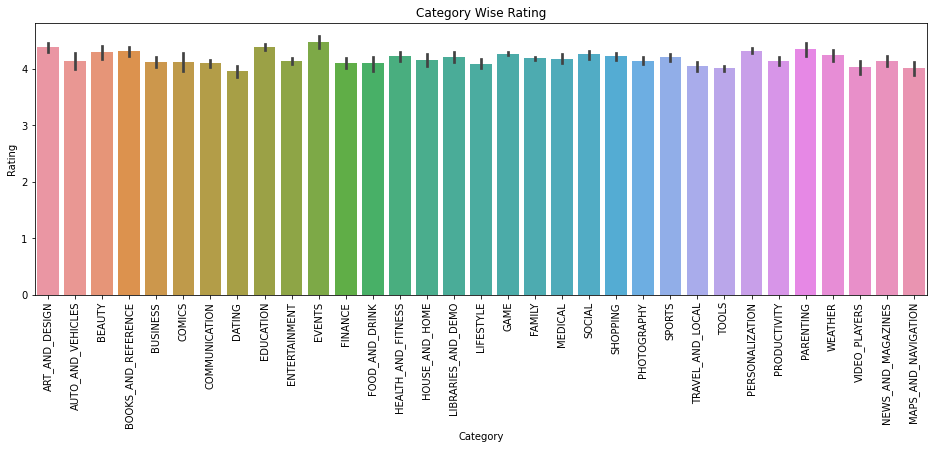

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Category Wise Rating')
plt.xlabel('Categories')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
sns.barplot(x='Category',y='Rating',data=df1)
plt.show()


From the above graph, we can see the ratings given to the Apps on the basis of their Category

* Q2. Top 10 installed Apps in Sports Category

In [ ]:
top10 = df1[df1['Category'] == 'SPORTS']
top = top10.sort_values(by='Installs',ascending=False).head(10)

In [ ]:
top.value_counts()

App                                                 Category  Rating  Reviews   Size        Installs   Type  Price  Content Rating  Genres  Last Updated      Current Ver  Android Ver 
theScore: Live Sports Scores, News, Stats & Videos  SPORTS    4.4     133833    34000000.0  10000000   Free  0.0    Everyone 10+    Sports  July 25, 2018     6.17.2       4.4 and up      1
Wrestling Revolution 3D                             SPORTS    4.3     989344    51000000.0  50000000   Free  0.0    Teen            Sports  July 23, 2018     1.640        4.0 and up      1
PES 2018 PRO EVOLUTION SOCCER                       SPORTS    4.4     1721943   26000000.0  10000000   Free  0.0    Everyone        Sports  June 27, 2018     2.3.2        5.0 and up      1
NBA LIVE Mobile Basketball                          SPORTS    4.4     1690802   58000000.0  50000000   Free  0.0    Everyone        Sports  May 21, 2018      2.3.1        4.0 and up      1
FIFA Soccer                                         SPORTS  

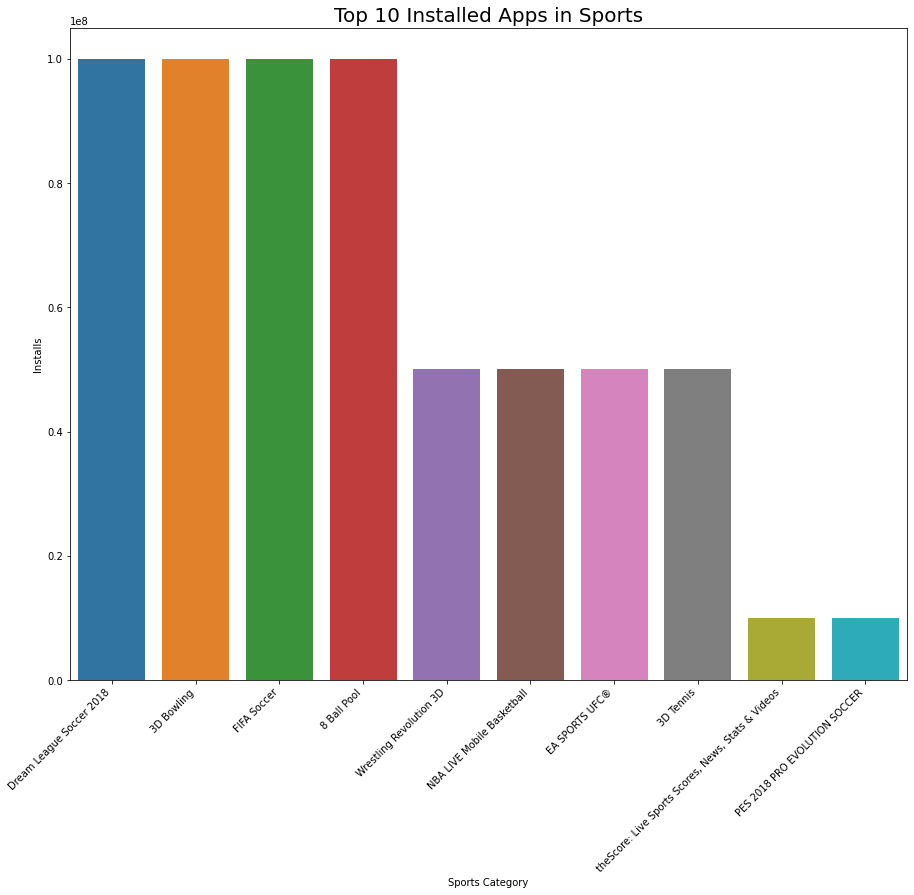

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Top 10 Installed Apps in Sports',size=20)
plt.xticks(rotation=45,horizontalalignment='right')
sns.barplot(x=top.App,y=top.Installs)
plt.xlabel('Sports Category')
plt.show()

From the above graph, we can see that in the Sports category Dream League Soccer2018, 3D Bowling, FIFA Soccer and 8 Ball Pool has the highest installs. 

* Q3. Distribution of Ratings

In [ ]:
df1['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7723, dtype: float64

In [ ]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

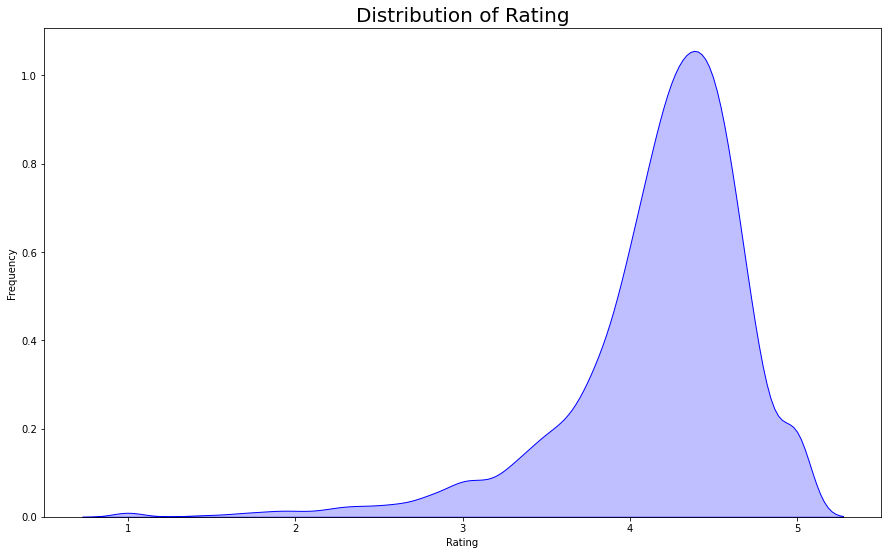

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
sns.kdeplot(df1.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20)
plt.show()

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.

* Q4. Percent of Free vs Paid apps in Play Store

In [ ]:
labels = df1['Type'].value_counts(sort = True).index
labels

Index(['Free', 'Paid'], dtype='object')

In [ ]:
sizes = df1['Type'].value_counts(sort = True)
sizes

Free    7146
Paid     577
Name: Type, dtype: int64

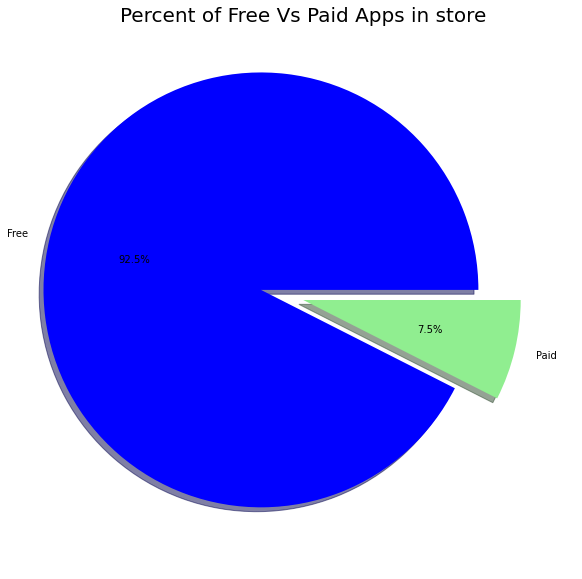

In [ ]:
plt.figure(figsize=(10,10))
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.

* Q5. Highest-Earning Apps

In [ ]:
Paid_Apps = df1[df1['Type'] == 'Paid']
Paid_Apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861000.0,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [ ]:
earning = Paid_Apps[['App', 'Installs', 'Price']]      #selecting columns required from dataframe
earning['Earnings'] = earning['Installs'] * earning['Price']      #creating new column Earning by multiplying Installs and Price
#Sort above data by Earning
earning_sorted_by_Earnings = earning.sort_values(by='Earnings', ascending=False).head(50)
earning_sorted_by_Earnings


,App,Installs,Price,Earnings
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
4034,Hitman Sniper,10000000,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000,6.99,6990000.0
5578,Sleep as Android Unlock,1000000,5.99,5990000.0
2950,Facetune - For Free,1000000,5.99,5990000.0
2883,Facetune - For Free,1000000,5.99,5990000.0
2912,Facetune - For Free,1000000,5.99,5990000.0
8804,DraStic DS Emulator,1000000,4.99,4990000.0
4367,I'm Rich - Trump Edition,10000,400.00,4000000.0


In [ ]:
#Sort data by Price
earning_sorted_by_Price = earning_sorted_by_Earnings.sort_values(by='Price', ascending=False)
earning_sorted_by_Price

,App,Installs,Price,Earnings
4367,I'm Rich - Trump Edition,10000,400.00,4000000.0
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
5362,I Am Rich Pro,5000,399.99,1999950.0
5359,I am rich(premium),5000,399.99,1999950.0
5354,I am Rich Plus,10000,399.99,3999900.0
4362,💎 I'm rich,10000,399.99,3999900.0
5369,I am Rich,5000,399.99,1999950.0
5366,I Am Rich,10000,389.99,3899900.0
5355,I am rich VIP,10000,299.99,2999900.0


Text(0.5, 1.0, 'Top Earning Apps')

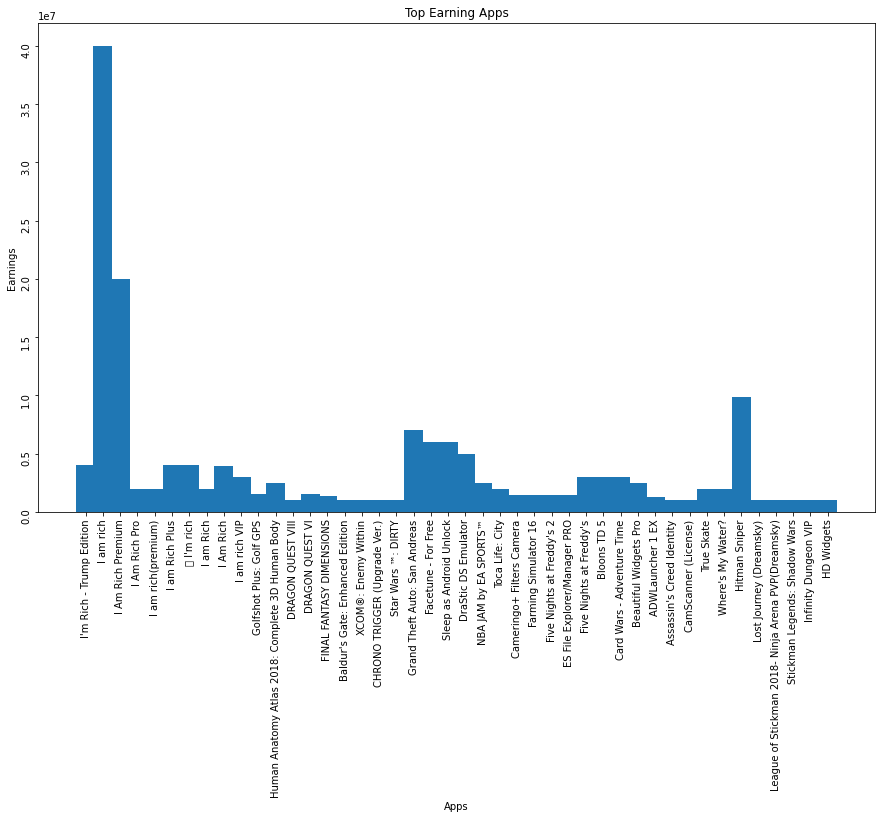

In [ ]:
# PLot a bar chart of app names at x and earning at y
plt.figure(figsize=(15,9))
plt.bar(earning_sorted_by_Price.App, earning_sorted_by_Price.Earnings, width=1.1, label=earning_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps")

## Conclusion

After Analyzing the given dataset, we have answered some serious & interesting questions which any of the android users would love to know.